**About the algorithm**
- Logistic regression is a binary classification technique that predicts the probability of an observation   belonging to a particular category. Key points:

1. **Binary Outcome**: Used for binary outcomes, with the dependent variable having two categories.

2. **Logit Function**: Utilizes the logistic function to model the relationship between independent variables and the log-odds of the outcome, ensuring predicted probabilities fall between 0 and 1.

3. **Model Training**: Coefficients are estimated via techniques like maximum likelihood estimation to optimize the likelihood of observing actual outcomes given predictor variables.

4. **Decision Boundary**: Establishes a boundary based on learned coefficients, dividing the space into regions corresponding to the two outcomes.

5. **Prediction**: After training, the model calculates probabilities for each category, with a threshold (often 0.5) applied to classify observations.

Logistic regression is widely applied across domains due to its simplicity, interpretability, and efficacy in binary classification tasks.

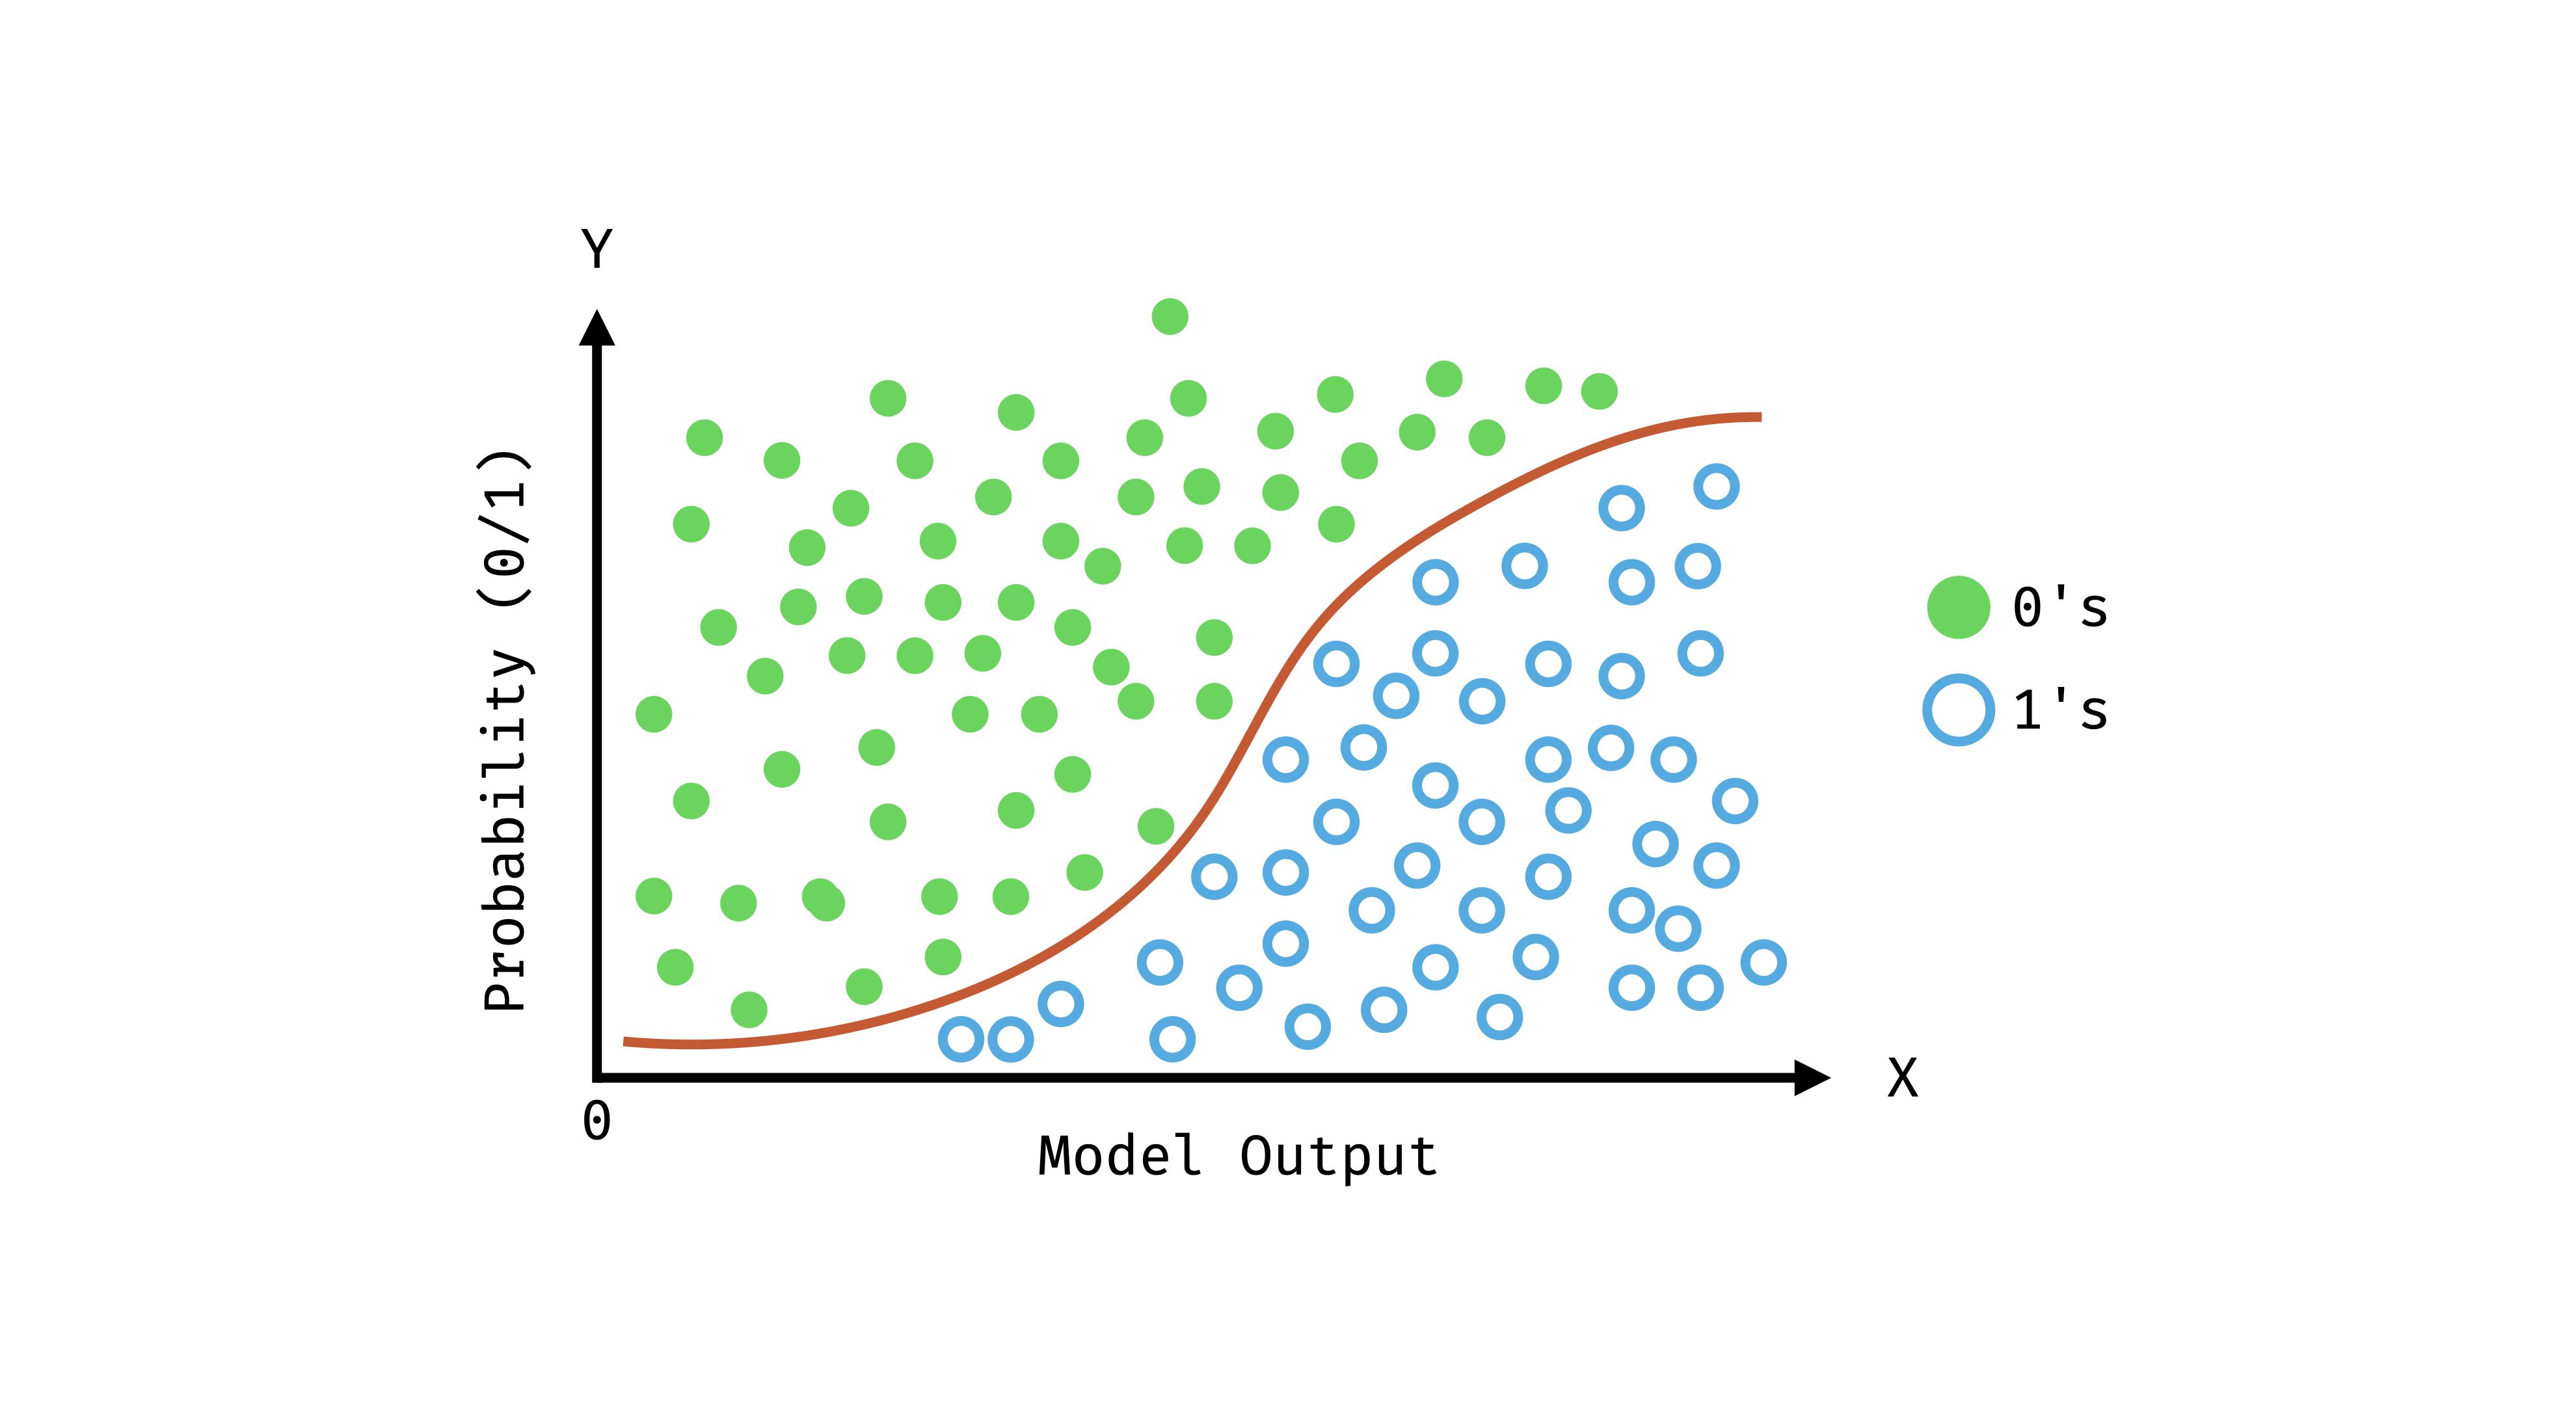

In [2]:
from IPython.display import Image
image_path = "4.regression.003.jpeg"
Image(filename=image_path)

✔✨ Import Libraries

In [152]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display

✔✨ Loading data for binary classification

In [153]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


✔✨ Data Cleaning

In [154]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 ✨convert Totalcharges from object to  numeric if possible , else set it as Null

In [155]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"] ,errors="coerce")


In [156]:
data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

🕵️‍♀️- Note that null values are in Totalcharges  column, so we need to handle it 

✨ Fill null values with mean 

In [157]:
data.fillna(data["TotalCharges"].mean() ,inplace=True)

In [158]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [159]:
data.columns = data.columns.str.lower().str.replace(" ","_")

In [160]:
for col in data.columns:
    if data[col].dtype =="object":
        data[col]  = data[col].str.lower().str.replace(" ","_")


In [161]:
data["seniorcitizen"] = data["seniorcitizen"].astype("object")

✔✨ Data Analysis

In [162]:
data.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [163]:
(data==0).sum()

customerid             0
gender                 0
seniorcitizen       5901
partner                0
dependents             0
tenure                11
phoneservice           0
multiplelines          0
internetservice        0
onlinesecurity         0
onlinebackup           0
deviceprotection       0
techsupport            0
streamingtv            0
streamingmovies        0
contract               0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
churn                  0
dtype: int64

In [164]:
data = data[data["tenure"]!=0]
(data==0).sum()

customerid             0
gender                 0
seniorcitizen       5890
partner                0
dependents             0
tenure                 0
phoneservice           0
multiplelines          0
internetservice        0
onlinesecurity         0
onlinebackup           0
deviceprotection       0
techsupport            0
streamingtv            0
streamingmovies        0
contract               0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
churn                  0
dtype: int64

✨ Describe categorical data

In [165]:
data.describe(include="object")    

,customerid,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-vhveg,male,0,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,no
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [166]:
data['churn'].value_counts()
1869/7043

0.2653698707936959

In [167]:
data['churn']=(data['churn']=="yes").astype("int64")

In [168]:
mean = data["churn"].mean()   #know mean 

In [169]:
data["gender"].value_counts()

male      3549
female    3483
Name: gender, dtype: int64

In [170]:
males = data[data["gender"] =="male"]
males.churn.mean()

0.26204564666103125

In [171]:
females = data[data["gender"] =="female"]
females.churn.mean()

0.2695951765719208

- 🕵️‍♀️ Note :
  (gender) :The average of men who unsubscribed is the same as women, so this feature has no effect

In [172]:
senior1 = data[data["seniorcitizen"] == 0]
senior1.churn.mean()

0.2365025466893039

 - 🕵️‍♀️ Note :
    - (seniorcitizen) :The largest percentage cancels, so this feature is important

In [173]:
senior2 = data[data["seniorcitizen"] == 1]    
senior2.churn.mean()

0.4168126094570928

 ✔✨ Do the same with other categorical features

In [174]:
categorical = data.select_dtypes("object").columns
categorical = categorical.drop("customerid")             # drop id  column from categorical features
categorical

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [175]:
for col in categorical:
    df_groups = data.groupby(col).churn.agg(["mean"])
    df_groups["diff"] = (df_groups["mean"] - mean )        # feature mean - target mean 
    display(df_groups)

,mean,diff
gender,,
female,0.269595,0.003810
male,0.262046,-0.003739


,mean,diff
seniorcitizen,,
0,0.236503,-0.029282
1,0.416813,0.151028


,mean,diff
partner,,
no,0.329761,0.063976
yes,0.197171,-0.068614


,mean,diff
dependents,,
no,0.312791,0.047006
yes,0.155312,-0.110473


,mean,diff
phoneservice,,
no,0.250000,-0.015785
yes,0.267475,0.001690


,mean,diff
multiplelines,,
no,0.250812,-0.014973
no_phone_service,0.250000,-0.015785
yes,0.286485,0.020700


,mean,diff
internetservice,,
dsl,0.189983,-0.075802
fiber_optic,0.418928,0.153143
no,0.074342,-0.191443


,mean,diff
onlinesecurity,,
no,0.417787,0.152002
no_internet_service,0.074342,-0.191443
yes,0.146402,-0.119383


,mean,diff
onlinebackup,,
no,0.399417,0.133632
no_internet_service,0.074342,-0.191443
yes,0.215670,-0.050115


,mean,diff
deviceprotection,,
no,0.391403,0.125618
no_internet_service,0.074342,-0.191443
yes,0.225393,-0.040392


,mean,diff
techsupport,,
no,0.416475,0.150690
no_internet_service,0.074342,-0.191443
yes,0.151961,-0.113824


,mean,diff
streamingtv,,
no,0.335351,0.069566
no_internet_service,0.074342,-0.191443
yes,0.301147,0.035362


,mean,diff
streamingmovies,,
no,0.337289,0.071504
no_internet_service,0.074342,-0.191443
yes,0.299524,0.033739


,mean,diff
contract,,
month-to-month,0.427097,0.161312
one_year,0.112772,-0.153013
two_year,0.028487,-0.237298


,mean,diff
paperlessbilling,,
no,0.163757,-0.102028
yes,0.335893,0.070108


,mean,diff
paymentmethod,,
bank_transfer_(automatic),0.167315,-0.098470
credit_card_(automatic),0.152531,-0.113254
electronic_check,0.452854,0.187069
mailed_check,0.192020,-0.073765


-  🕵️‍♀️ Note :
   drop features with small difference (have no effect)

In [176]:
data.drop(["customerid", "gender","dependents","phoneservice","multiplelines","streamingmovies"], axis=1, inplace=True)

✨ Correlation

C:\Users\Skytop\AppData\Local\Temp\ipykernel_2232\460133985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

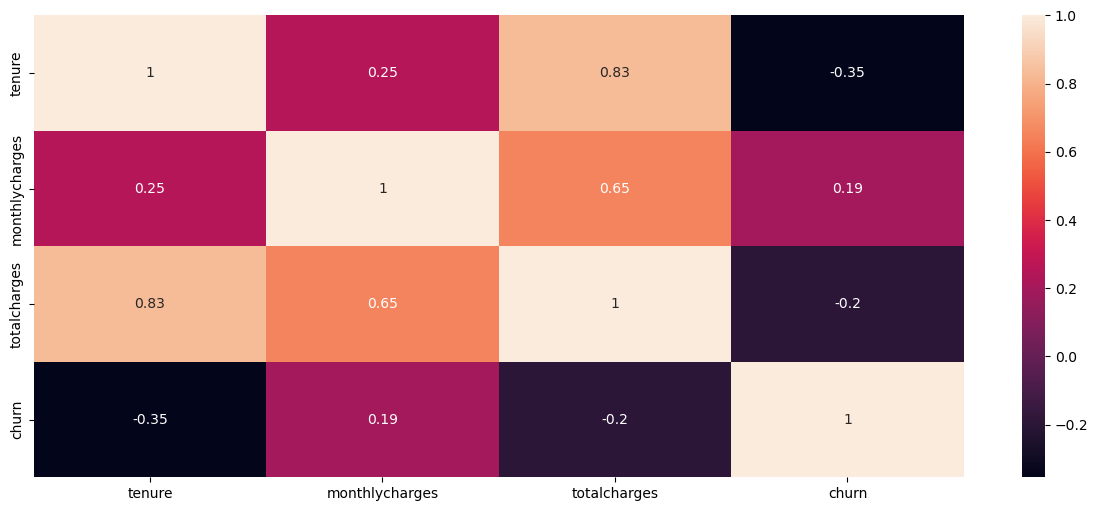

In [177]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

🕵️‍♀️ - Note : there is strong relationship between (total charges) and (monthlycharges) >> so we will drop one of them which has weaker relationship with tatget ... drop (totalcharges) 
        

In [178]:
data.drop(["totalcharges"], axis=1, inplace=True)

✨ Encoding categorical data

In [179]:
categorical = data.select_dtypes("object").columns
data = pd.get_dummies(data, columns= categorical)

C:\Users\Skytop\AppData\Local\Temp\ipykernel_2232\2226953883.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns= categorical)


✨ Split data ( x , y )

In [180]:
x = data.drop(["churn"], axis=1)
y = data["churn"]

 ✨Split x (train and test )

In [181]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)


✨ Scalling 

In [182]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

✨ Build Model

In [183]:
model = LogisticRegression(solver="saga",penalty='l1')
model.fit(x_scaled , y_train)

LogisticRegression(penalty='l1', solver='saga')

✨ Check accurecy

In [184]:
model.score(x_scaled, y_train)*100

80.37333333333333

In [185]:
model.score(x_test, y_test)*100

c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


77.46979388770433

✨ Predict probability  >> both : p(y=1) , p(y=0) 

In [186]:
y_predicted = model.predict_proba(x_test)    
y_predicted

c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[2.99043679e-01, 7.00956321e-01],
       [9.99983145e-01, 1.68551866e-05],
       [3.82294777e-01, 6.17705223e-01],
       ...,
       [4.02112981e-03, 9.95978870e-01],
       [1.00000000e+00, 6.02862532e-16],
       [7.28072404e-01, 2.71927596e-01]])

✨ Predict probability  >> set threshold and Predict if the output belongs to  class (1) or not

In [187]:
y_predicted = y_predicted[:, 1]
y_predicted = (y_predicted > .7).astype('int64')  #threshold
y_predicted

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

✨ Predict if the output belongs to class (0) or class (1) with default threshold  of 0.5

In [188]:
y = model.predict(x_test)
y

c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

Thanks ❤